In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load train data
train_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', sep=':::', names=['title', 'genre', 'description'], engine='python')

train_data.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
train_data.describe()

,title,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [6]:
train_data.isnull().sum()

title          0
genre          0
description    0
dtype: int64

In [10]:
# Load test data
test_data = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt', sep=':::', names=['id', 'title', 'description'], engine='python')

test_data.head()

,id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   title        54200 non-null  object
 2   description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


Text(0.5, 1.0, 'Genre Distribution')

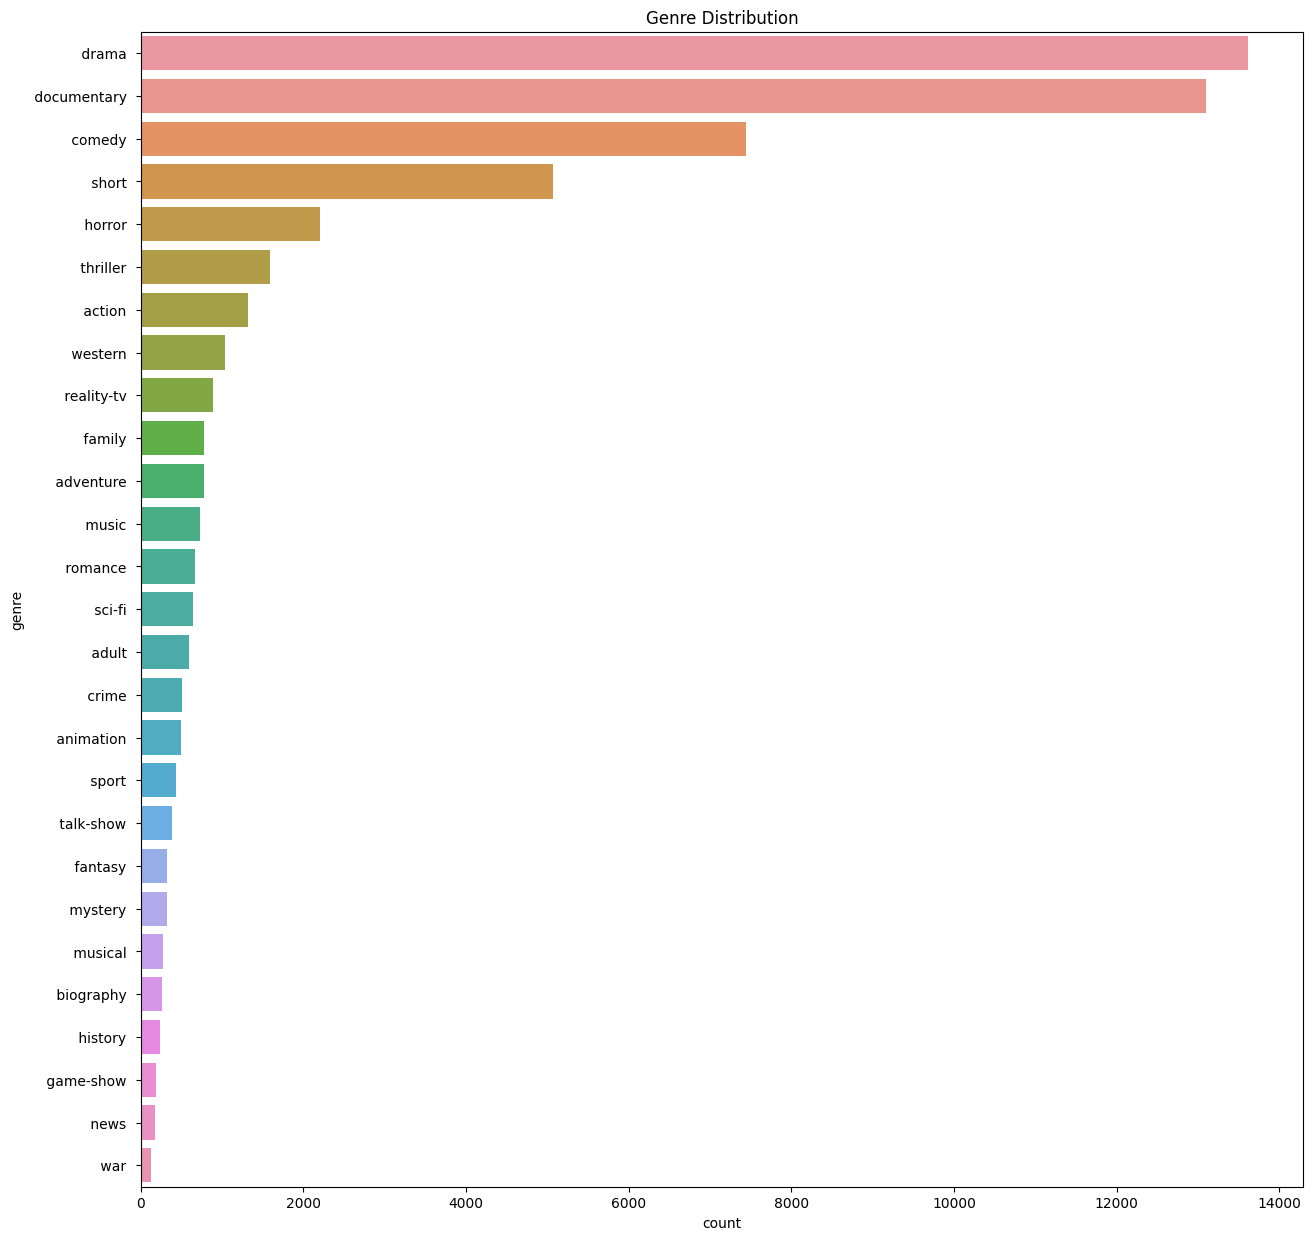

In [14]:
plt.figure(figsize=(15, 15))
sns.countplot(data=train_data, order=train_data['genre'].value_counts().index, y='genre')
plt.title('Genre Distribution')

In [16]:
import stop_words
import string
import nltk
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = ''.join([char for char in text if char not in string.punctuation])
    
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = ' '.join([word for word in words if word not in stopwords and len(word) > 2])
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
    
train_data['cleaned_description'] = train_data['description'].apply(clean_text)
test_data['cleaned_description'] = test_data['description'].apply(clean_text)

In [17]:
train_data.head()

,title,genre,description,cleaned_description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdidf_vect = TfidfVectorizer()

train_data_vect = tdidf_vect.fit_transform(train_data['cleaned_description'])
test_data_vect = tdidf_vect.fit_transform(test_data['cleaned_description'])

In [21]:
from sklearn.model_selection import train_test_split

X = train_data_vect
Y = train_data['genre']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'X_train size: {X_train.shape}')
print(f'X_test size: {X_test.shape}')

X_train size: (43371, 116738)
X_test size: (10843, 116738)


In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
from sklearn.metrics import accuracy_score

y_pred = lr.predict(X_test)

score = accuracy_score(y_pred, y_test)
print(f'Score: {score}')

Score: 0.5761320667711888
